#### Portfolio Analysis. 

For our model we want to see brands related to the Sport wear segment. This comes more form a prior analysis done over Lululemon. This will expand and analyze Lululemon against other wear companies, on the recent highlights fall of Lululemon's Stock Price. 

For this exercise we choose the company 

-**Lululemon** as "LULU" 

-**Under Armour** as "UA",

-**Nike** as "NKE",

-**Addidas** as "ADDYY"

However, we want to create the analysis for a short time investment and see how to invest the money and bring the most amount of money in a short time spam. 

In [1]:
import pandas as pd
import numpy as np 
import yfinance as yf 
import matplotlib.pyplot as plt
%matplotlib inline

For our problem we decide to check 2 time periods. 6 month and 1 year. 

[*********************100%%**********************]  4 of 4 completed


<Axes: xlabel='Date'>

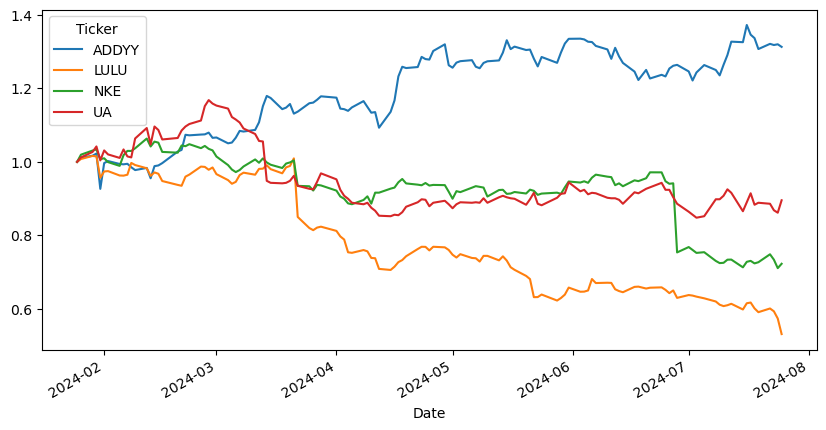

In [2]:
#load our 6 months data
df = yf.download(["LULU","UA","NKE","ADDYY"],period="6mo")
pf_data_6mo = df ["Adj Close"]

(pf_data_6mo/pf_data_6mo.iloc[0]).plot(figsize=(10,5))

[*********************100%%**********************]  4 of 4 completed


<Axes: xlabel='Date'>

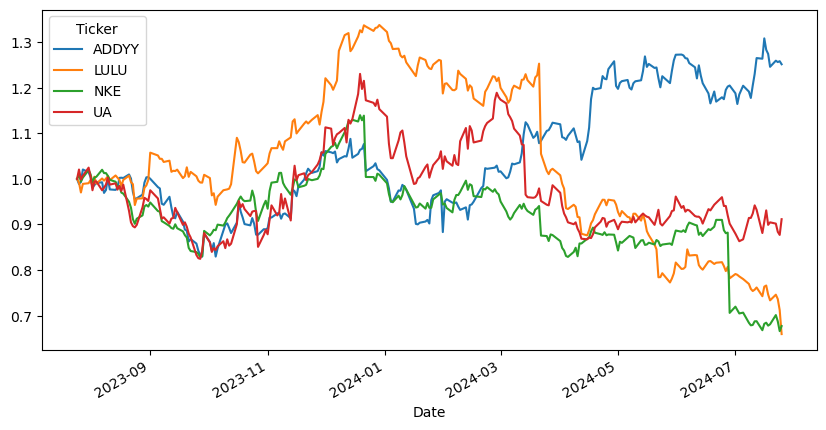

In [3]:
#load our 1 year data
df = yf.download(["LULU","UA","NKE","ADDYY"],period="1y")
pf_data_1y = df ["Adj Close"]

(pf_data_1y/pf_data_1y.iloc[0]).plot(figsize=(10,5))

In [10]:
# we create a function to calculate volatility for any data set. To latter use it within 
# the Create_visual Function
def Calc_Volatility(Data,pf_weights,pf_returns,pf_volatility):
    # create a rate of change between days
    log_returns = np.log(Data/Data.shift(1))

    # create a mean for the change per day and create an annual proyection. 
    log_returns.mean()*252


    num_assets = len(Data.columns)

    for x in range(1000):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        weights

        pf_weights.append(weights)
        pf_returns.append(np.sum(weights * log_returns.mean()*252))
        pf_volatility.append(np.dot(weights.T,np.dot(log_returns.cov()*252,weights))**0.5)


In [30]:
#The create visual we make use of the function Calc_Volatility allowing us to input data and
#calculate its volatility and visual with in 1 function. 
def Create_visual(data_ab):
    # analysis for 6 months
    pf_weights=[]
    pf_returns=[]
    pf_volatility=[]

    Calc_Volatility(data_ab,pf_weights,pf_returns,pf_volatility)

    portfolio={"returns": pf_returns,
            "volatility": pf_volatility}

    for counter, symbol in enumerate(data_ab.columns.tolist()):
        portfolio[symbol + " Weight"]=[w[counter] for w in pf_weights]
        
    portfolio = pd.DataFrame(portfolio)

    portfolio.plot(x="volatility",y="returns",kind="scatter",figsize=(10,5))
    plt.xlabel("Volatility")
    plt.ylabel("Returns")

    min_vol_port  =  portfolio.iloc[portfolio["volatility"].idxmin()]
    max_vol_port  =  portfolio.iloc[portfolio["volatility"].idxmax()]
    min_vol_port,max_vol_port

(None,
 returns        -0.101993
 volatility      0.231193
 ADDYY Weight    0.381684
 LULU Weight     0.099873
 NKE Weight      0.159367
 UA Weight       0.359075
 Name: 227, dtype: float64,
 returns        -0.892374
 volatility      0.325311
 ADDYY Weight    0.194950
 LULU Weight     0.777297
 NKE Weight      0.004515
 UA Weight       0.023239
 Name: 120, dtype: float64)

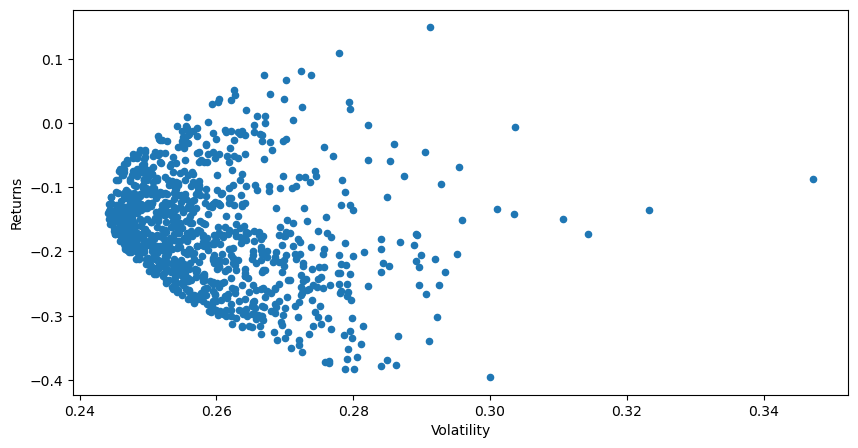

In [35]:
#Crating the graphs for pf_data_1y, and showing the variables generated in the previous function. 
Create_visual(pf_data_1y),min_vol_port,max_vol_port

(None,
 returns        -0.101993
 volatility      0.231193
 ADDYY Weight    0.381684
 LULU Weight     0.099873
 NKE Weight      0.159367
 UA Weight       0.359075
 Name: 227, dtype: float64,
 returns        -0.892374
 volatility      0.325311
 ADDYY Weight    0.194950
 LULU Weight     0.777297
 NKE Weight      0.004515
 UA Weight       0.023239
 Name: 120, dtype: float64)

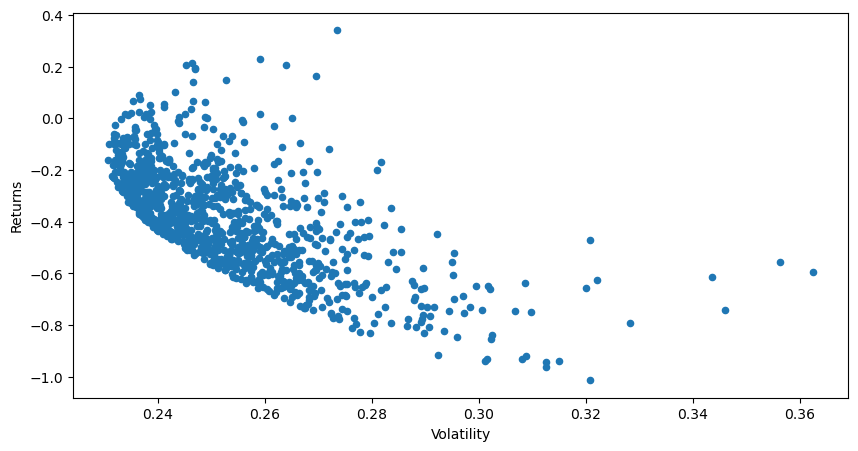

In [36]:
#Crating the graphs for pf_data_1y, and showing the variables generated in the previous function. 
Create_visual(pf_data_6mo)

In [27]:
#Create a function to return the correlation and the mean.
def Calc_corr_mean(data):
    # create a rate of change between days
    log_returns = np.log(data/data.shift(1))

    # create a mean for the change per day and create an annual proyection. 
    
    return (log_returns.corr(),log_returns.mean()*252)

In [44]:

print("1 year data \n\n",Calc_corr_mean(pf_data_1y),"\n\n 6 month data\n\n",Calc_corr_mean(pf_data_6mo))

1 year data 

 (Ticker     ADDYY      LULU       NKE        UA
Ticker                                        
ADDYY   1.000000  0.337704  0.316290  0.356480
LULU    0.337704  1.000000  0.385565  0.305078
NKE     0.316290  0.385565  1.000000  0.423424
UA      0.356480  0.305078  0.423424  1.000000, Ticker
ADDYY    0.224592
LULU    -0.416504
NKE     -0.390182
UA      -0.092552
dtype: float64) 

 6 month data

 (Ticker     ADDYY      LULU       NKE        UA
Ticker                                        
ADDYY   1.000000  0.314649  0.147670  0.199322
LULU    0.314649  1.000000  0.392880  0.217366
NKE     0.147670  0.392880  1.000000  0.329441
UA      0.199322  0.217366  0.329441  1.000000, Ticker
ADDYY    0.549220
LULU    -1.275340
NKE     -0.654898
UA      -0.222462
dtype: float64)


We can see that the information for both scenarios, the fitness wear is not an advisable investment. however, if the decision to invest in fitness wear, we recommend splitting the money the following way.

[*********************100%%**********************]  4 of 4 completed


<Axes: xlabel='Date'>

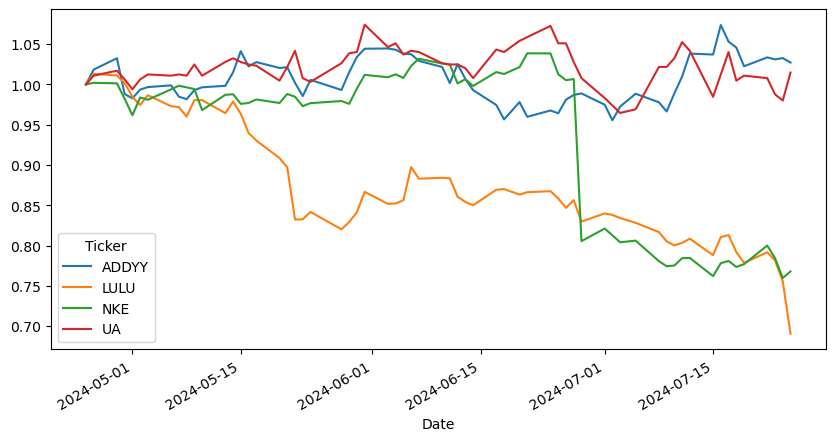

In [60]:
#load our 3 months data
df = yf.download(["LULU","UA","NKE","ADDYY"],period="3mo")
pf_data_3mo = df ["Adj Close"]

(pf_data_3mo/pf_data_3mo.iloc[0]).plot(figsize=(10,5))

In [54]:
#The create visual we make use of the function Calc_Volatility allowing us to input data and
#calculate its volatility and visual with in 1 function. 
def Min_earning(data_ab):
    # analysis for 6 months
    pf_weights=[]
    pf_returns=[]
    pf_volatility=[]

    Calc_Volatility(data_ab,pf_weights,pf_returns,pf_volatility)

    portfolio={"returns": pf_returns,
            "volatility": pf_volatility}

    for counter, symbol in enumerate(data_ab.columns.tolist()):
        portfolio[symbol + " Weight"]=[w[counter] for w in pf_weights]
        
    portfolio = pd.DataFrame(portfolio)

    min_vol_port  =  portfolio.iloc[portfolio[(portfolio["returns"]>0)]["volatility"].idxmin()]
    return(min_vol_port)

In [61]:
#distribution for returns equal to 0 
print("1 year data \n\n",Min_earning(pf_data_1y),"\n\n 6 months data \n\n" , Min_earning(pf_data_6mo),"\n\n 3 months data \n\n" , Min_earning(pf_data_3mo))

1 year data 

 returns         0.004808
volatility      0.254218
ADDYY Weight    0.554945
LULU Weight     0.169033
NKE Weight      0.080229
UA Weight       0.195793
Name: 459, dtype: float64 

 6 months data 

 returns         0.016279
volatility      0.233904
ADDYY Weight    0.452372
LULU Weight     0.056376
NKE Weight      0.117911
UA Weight       0.373341
Name: 307, dtype: float64 

 3 months data 

 returns         0.025520
volatility      0.199199
ADDYY Weight    0.566826
LULU Weight     0.026830
NKE Weight      0.017354
UA Weight       0.388990
Name: 169, dtype: float64


In a period of 6 months the represent the highest return in the shortest period. Additionally, as we reduce the time to 3 months, it seams to be netter not to invest in Lululemon, and adidas standing as the best investment option. 